#### Importing Libraries

In [305]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_parquet("/Users/tevfikerkut/Downloads/dataset_300_items.parquet")
df.DateKey = pd.to_datetime(df.DateKey, format= "%Y%m%d")
df = df.sort_values("DateKey").reset_index(drop = True)
df.head()

,DateKey,StoreCount,ShelfCapacity,PromoShelfCapacity,UnitPromotionThreshold,IsPromo,national_holiday_new_years_day,national_holiday_good_friday,national_holiday_easter_sunday,national_holiday_easter_monday,...,SundurationSum,MinAge,AlcoholPercentage,CommunicationChannel,ItemNumber,CategoryCode,GroupCode,UnitSales,BasePrice,DiscountPercentage
0,2016-01-04,187,11712.0,0,NaN,False,0,0,0,0,...,1.733333,NaN,NaN,None,9021,7289,5524,610.0,NaN,NaN
1,2016-01-04,827,7145.0,0,NaN,False,0,0,0,0,...,1.733333,NaN,NaN,None,8997,7291,5526,4389.0,NaN,NaN
2,2016-01-04,832,8884.0,0,NaN,False,0,0,0,0,...,1.733333,NaN,NaN,None,8071,7292,5577,358.0,NaN,NaN
3,2016-01-04,78,1412.0,0,NaN,False,0,0,0,0,...,1.733333,NaN,NaN,None,11316,7292,5492,217.0,NaN,NaN
4,2016-01-04,3,21.0,0,NaN,False,0,0,0,0,...,1.733333,NaN,NaN,None,9246,7292,5612,53.0,NaN,NaN


In [306]:
import warnings
warnings.filterwarnings('ignore')

In [307]:
df.isna().sum()

DateKey                                   0
StoreCount                                0
ShelfCapacity                          2497
PromoShelfCapacity                        0
UnitPromotionThreshold               126336
IsPromo                                   0
national_holiday_new_years_day            0
national_holiday_good_friday              0
national_holiday_easter_sunday            0
national_holiday_easter_monday            0
national_holiday_kings_day                0
national_holiday_rememberance_day         0
national_holiday_liberation_day           0
national_holiday_ascension                0
national_holiday_white_sunday             0
national_holiday_white_monday             0
national_holiday_christmas                0
national_holiday_boxing_day               0
SchoolHolidayMiddle                   94808
SchoolHolidayNorth                    94808
SchoolHolidaySouth                    94808
TempMin                                   0
TempMax                         

Wow! We have lots of null values in our dataset. I am dropping Base Price, Communication Channel, Alcohol Percentage, Minage and Unit Promotion Threshold. Other's can be filled by 0. For instance NAN in Discount Percentage would probably means %0 discount.

In [308]:
df = df.drop(columns = ["BasePrice", "CommunicationChannel", "AlcoholPercentage", "MinAge",
                   "UnitPromotionThreshold"])

In [309]:
df = df.drop(["RainFallSum"],1) ## Since it just contains 0

In [310]:
df.fillna(0, inplace = True)

Now, I am expanding the dataframe with more useful columns

In [311]:
# Expand dataframe with more useful columns
df.DateKey = pd.to_datetime(df.DateKey)
def expand_df(df):
    data = df.copy()
    data['day'] = data.DateKey.dt.day
    data['month'] = data.DateKey.dt.month
    data['year'] = data.DateKey.dt.year
    data['dayofweek'] = data.DateKey.dt.dayofweek
    data['week'] = data.DateKey.dt.week
    data["Month_year"] = data['DateKey'].apply(lambda x: x.strftime('%Y-%m'))
    data["week-year"] = data['DateKey'].apply(lambda x: x.strftime('%Y-%W'))
    data["day-year"] = data['DateKey'].apply(lambda x: x.strftime('%Y-%D'))
    return data

df = expand_df(df)
display(df)


,DateKey,StoreCount,ShelfCapacity,PromoShelfCapacity,IsPromo,national_holiday_new_years_day,national_holiday_good_friday,national_holiday_easter_sunday,national_holiday_easter_monday,national_holiday_kings_day,...,UnitSales,DiscountPercentage,day,month,year,dayofweek,week,Month_year,week-year,day-year
0,2016-01-04,187,11712.0,0,False,0,0,0,0,0,...,610.0,0.00,4,1,2016,0,1,2016-01,2016-01,2016-01/04/16
1,2016-01-04,827,7145.0,0,False,0,0,0,0,0,...,4389.0,0.00,4,1,2016,0,1,2016-01,2016-01,2016-01/04/16
2,2016-01-04,832,8884.0,0,False,0,0,0,0,0,...,358.0,0.00,4,1,2016,0,1,2016-01,2016-01,2016-01/04/16
3,2016-01-04,78,1412.0,0,False,0,0,0,0,0,...,217.0,0.00,4,1,2016,0,1,2016-01,2016-01,2016-01/04/16
4,2016-01-04,3,21.0,0,False,0,0,0,0,0,...,53.0,0.00,4,1,2016,0,1,2016-01,2016-01,2016-01/04/16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136804,2017-12-31,678,8663.0,0,True,0,0,0,0,0,...,1808.0,0.26,31,12,2017,6,52,2017-12,2017-52,2017-12/31/17
136805,2017-12-31,412,7902.0,0,False,0,0,0,0,0,...,241.0,0.00,31,12,2017,6,52,2017-12,2017-52,2017-12/31/17
136806,2017-12-31,535,5163.0,0,False,0,0,0,0,0,...,216.0,0.00,31,12,2017,6,52,2017-12,2017-52,2017-12/31/17
136807,2017-12-31,546,6894.0,0,True,0,0,0,0,0,...,75.0,0.25,31,12,2017,6,52,2017-12,2017-52,2017-12/31/17


In [312]:
df['DateKey'].apply(lambda x: x.strftime('%Y-%D'))

0         2016-01/04/16
1         2016-01/04/16
2         2016-01/04/16
3         2016-01/04/16
4         2016-01/04/16
              ...      
136804    2017-12/31/17
136805    2017-12/31/17
136806    2017-12/31/17
136807    2017-12/31/17
136808    2017-12/31/17
Name: DateKey, Length: 136809, dtype: object

In [313]:
df['DateKey'].apply(lambda x: x.strftime('%Y-%W')).value_counts()

2017-48    1517
2017-47    1512
2017-49    1509
2017-50    1505
2017-52    1499
           ... 
2016-22    1155
2016-23    1151
2016-21    1148
2016-52    1109
2017-00     185
Name: DateKey, Length: 105, dtype: int64

## Exploratary Data Analysis

#### Let's take a look at past monthly sales

In [314]:
monthly_sales = df.groupby(["Month_year"])["UnitSales"]
temp = monthly_sales.sum().astype(int).to_frame()

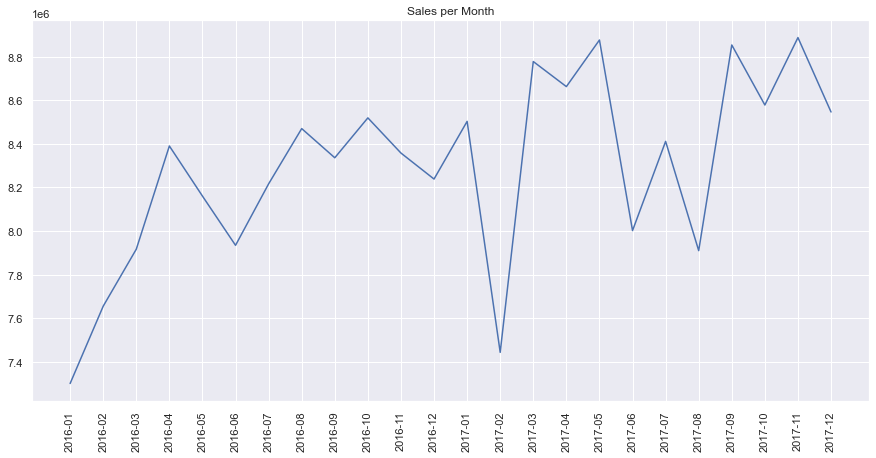

In [315]:
plt.figure(figsize=(15, 7))
plt.plot(temp.index, temp.UnitSales)
plt.xticks(rotation='vertical')
plt.title("Sales per Month")
plt.show()

It looks like we some ups and downs, especially a big drop in sales has happened at February of 2017. But its happened because its the end of previous week. So it just took account of 1 day, instead of 7. (2016-52th week contains 6 days)

Let's dig it some more by looking at weekly sales chart.

In [316]:
weekly_sales = df.groupby(["week-year"])["UnitSales"]
temp = weekly_sales.sum().astype(int).to_frame()

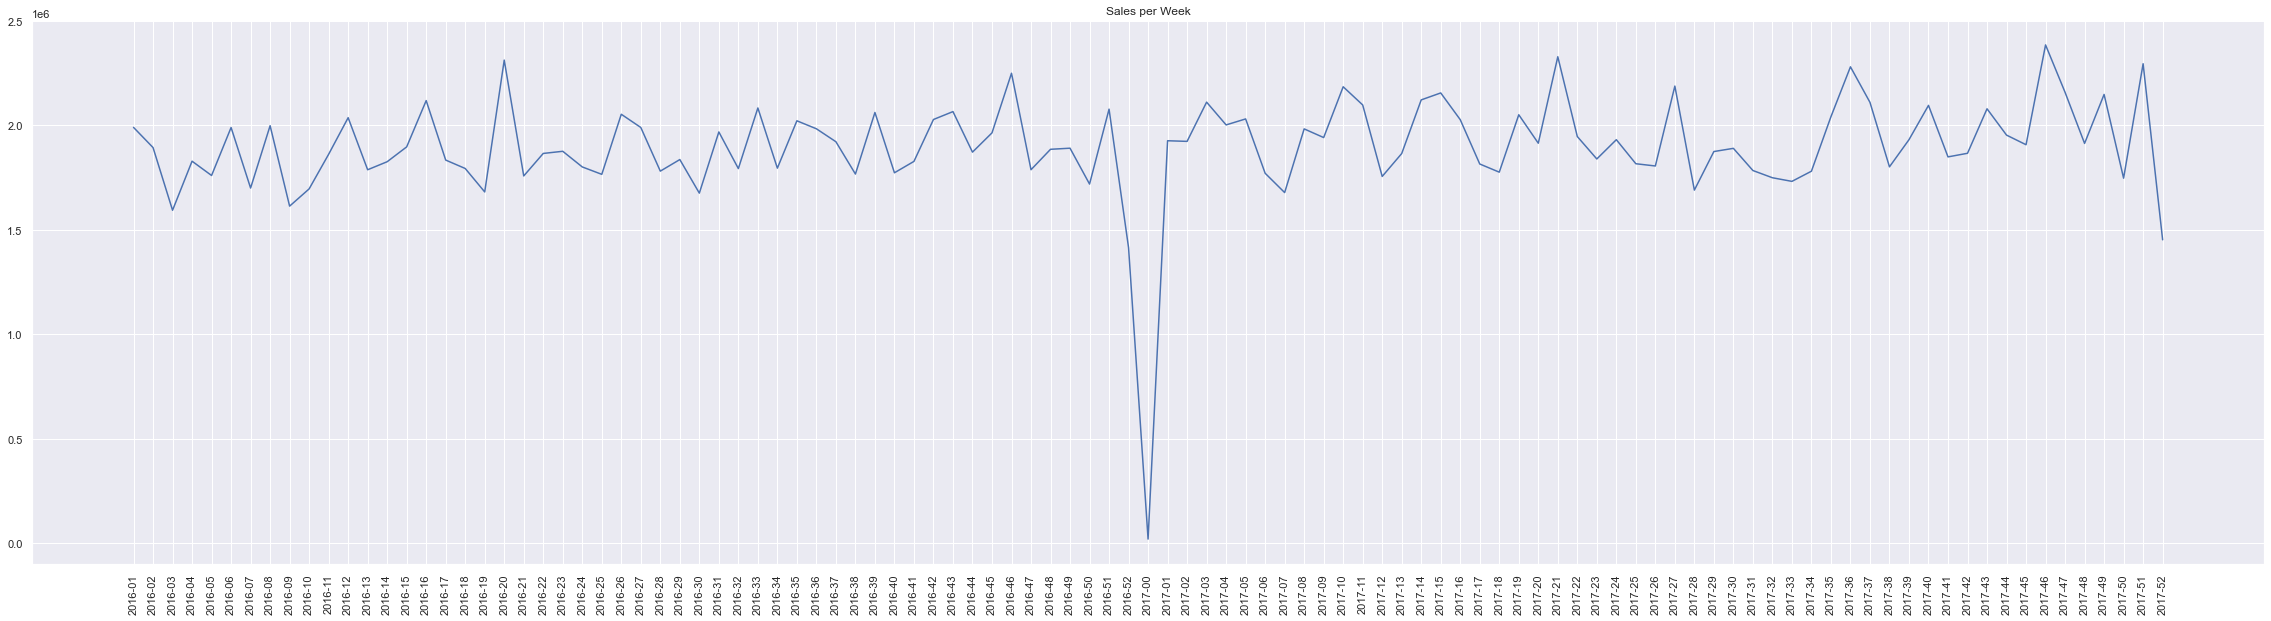

In [317]:
plt.figure(figsize=(40, 10))
plt.plot(temp.index, temp.UnitSales)
plt.xticks(rotation='vertical')
plt.title("Sales per Week")
plt.show()

In [318]:
daily_sales = df.groupby(["day-year"])["UnitSales"]
temp = daily_sales.sum().astype(int).to_frame()

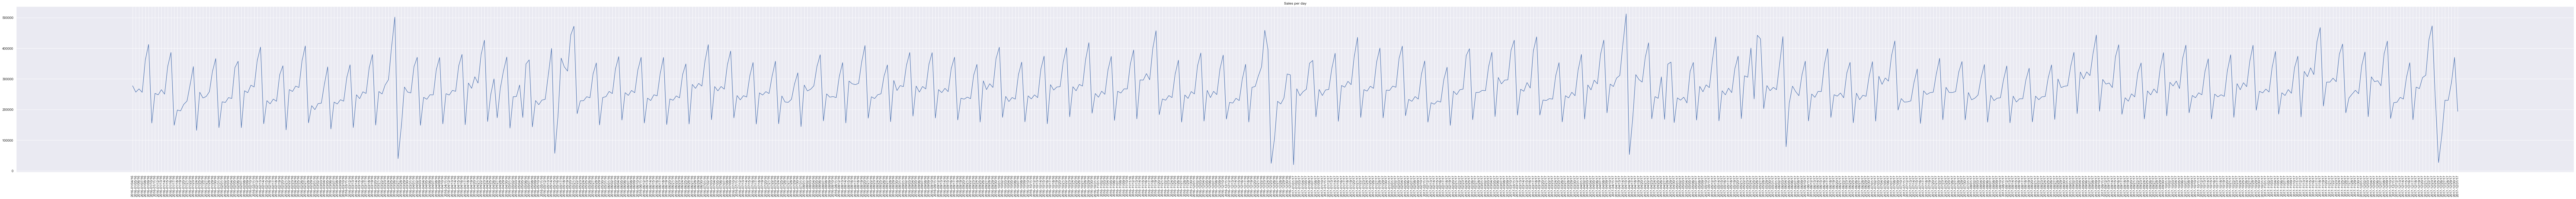

In [319]:
plt.figure(figsize=(150, 10))
plt.plot(temp.index, temp.UnitSales)
plt.xticks(rotation='vertical')
plt.title("Sales per day")
plt.show()
# this chart looks better in a Plots Section

Now, It's time for us to check correlation between features and Unit Sales

In [320]:
corr = df.corr()["UnitSales"].to_frame()
corr.style.background_gradient(cmap='RdBu_r')

,UnitSales
StoreCount,0.346036
ShelfCapacity,0.400611
PromoShelfCapacity,0.237077
IsPromo,0.081567
national_holiday_new_years_day,-0.012657
national_holiday_good_friday,0.010100
national_holiday_easter_sunday,-0.016070
national_holiday_easter_monday,-0.008375
national_holiday_kings_day,-0.006915
national_holiday_rememberance_day,-0.000811


StoreCount, ShelfCapacity, PromoShelfCapacity, IsPromo, ItemNumber, GroupCode, DiscountPercentage are the first ones that can be seen as impactful features through this plot.

##### StoreCount vs Sales

Text(0.5, 1.0, 'StoreCount vs Sales WEEKLY SUM')

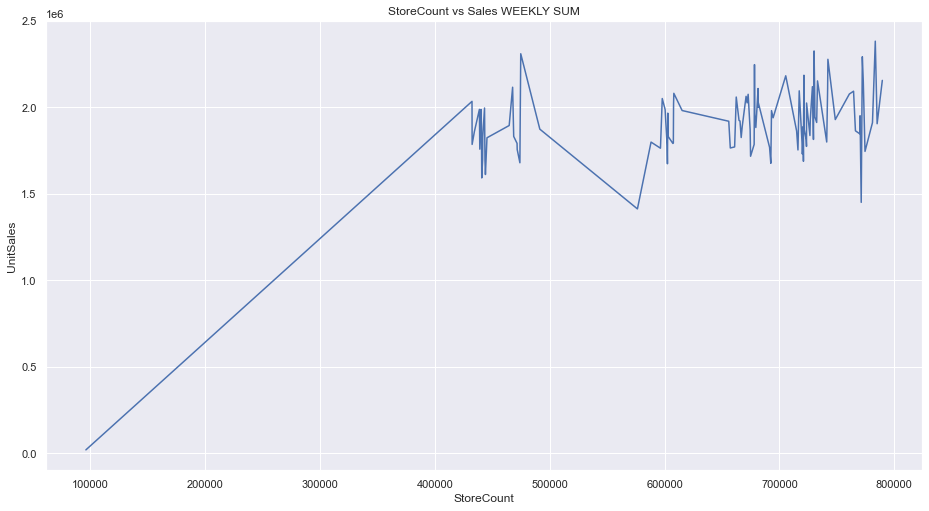

In [321]:
temp1 = df.groupby("week-year")["UnitSales"].sum().astype(int).to_frame()
temp2 = df.groupby("week-year")["StoreCount"].sum().astype(int).to_frame()

sns.lineplot(temp2.StoreCount ,temp1.UnitSales)
plt.title("StoreCount vs Sales WEEKLY SUM")

##### ShelfCapacity vs Sales

Text(0.5, 1.0, 'UnitSales vs ShelfCapacity WEEKLY SUM ')

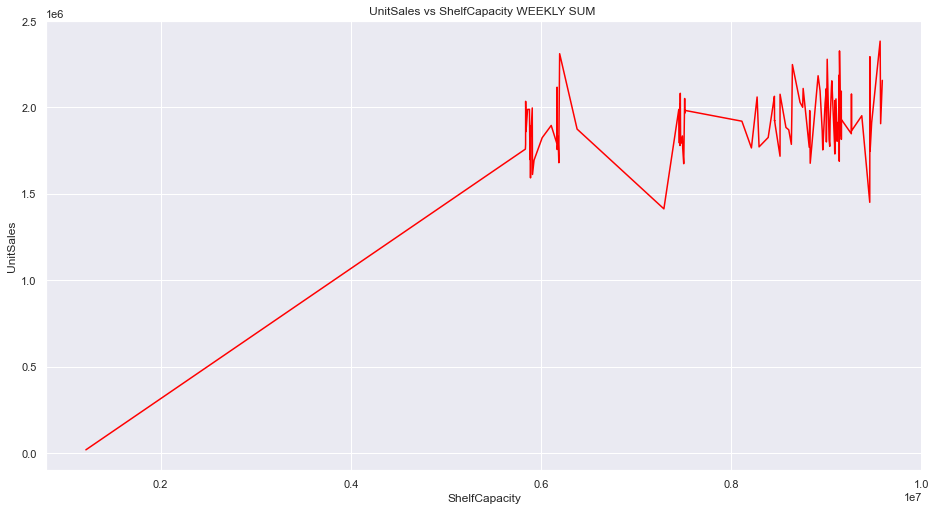

In [322]:
temp1 = df.groupby("week-year")["UnitSales"].sum().astype(int).to_frame()
temp2 = df.groupby("week-year")["ShelfCapacity"].sum().astype(int).to_frame()

sns.lineplot(temp2.ShelfCapacity ,temp1.UnitSales, color = "red")
plt.title("UnitSales vs ShelfCapacity WEEKLY SUM ")

##### Discount Percentage vs Sales

Text(0.5, 1.0, 'UnitSales vs Discount Percentage WEEKLY AVERAGE')

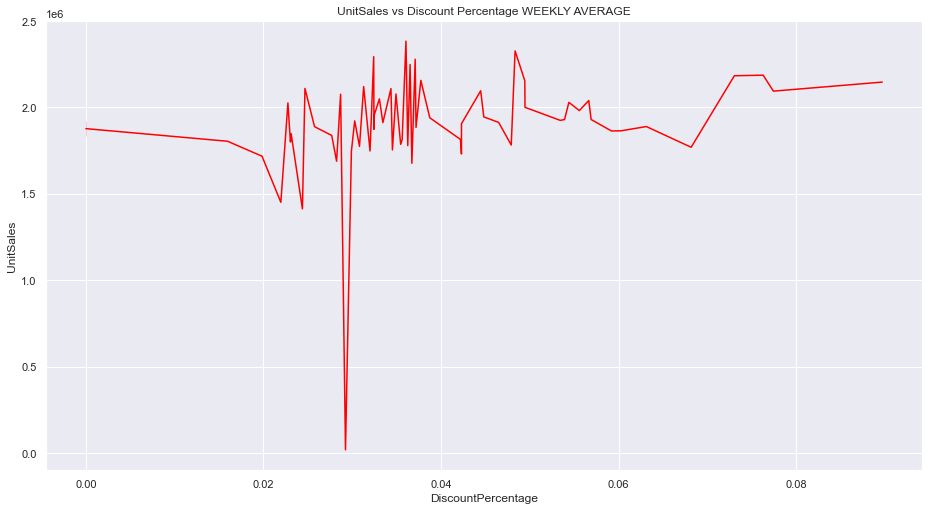

In [323]:
temp1 = df.groupby("week-year")["UnitSales"].sum().astype(int).to_frame()
temp2 = df.groupby("week-year")["DiscountPercentage"].mean().astype(float).to_frame()

sns.lineplot(temp2.DiscountPercentage ,temp1.UnitSales, color = "red")
plt.title("UnitSales vs Discount Percentage WEEKLY AVERAGE")

##### IsPromo vs Sales

I have sum'd all IsPromo values per week, and plotted it with sale numbers

Text(0.5, 1.0, 'UnitSales vs Is Promo WEEKLY SUM')

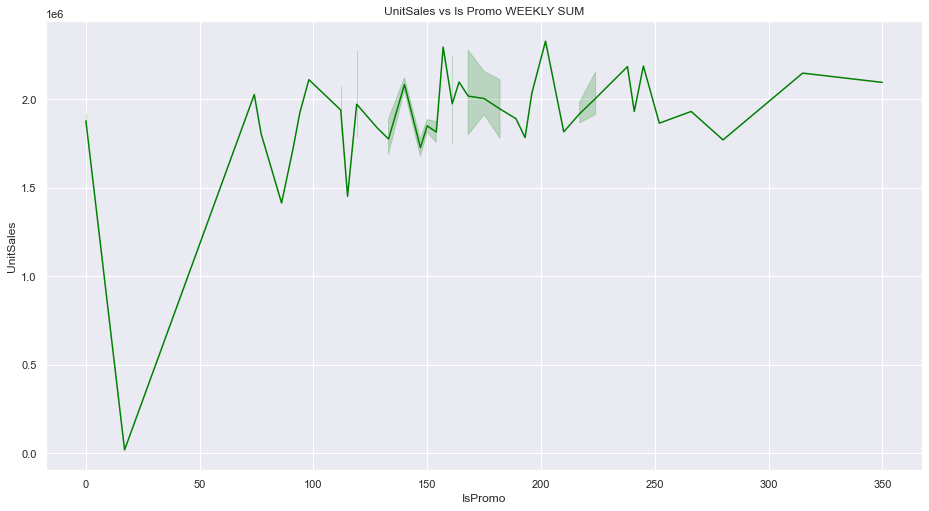

In [324]:
temp1 = df.groupby("week-year")["UnitSales"].sum().astype(int).to_frame()
temp2 = df.groupby("week-year")["IsPromo"].sum().astype(float).to_frame()

sns.lineplot(temp2.IsPromo ,temp1.UnitSales, color = "green")
plt.title("UnitSales vs Is Promo WEEKLY SUM")

#### Let's take a look at holidays and sale numbers relation

In [325]:
holiday_list = []
for i in ['national_holiday_new_years_day',
       'national_holiday_good_friday', 'national_holiday_easter_sunday',
       'national_holiday_easter_monday', 'national_holiday_kings_day',
       'national_holiday_rememberance_day', 'national_holiday_liberation_day',
       'national_holiday_ascension', 'national_holiday_white_sunday',
       'national_holiday_white_monday', 'national_holiday_christmas',
       'national_holiday_boxing_day', 'SchoolHolidayMiddle',
       'SchoolHolidayNorth', 'SchoolHolidaySouth']:
    profit = df.groupby(i).mean()
    profit = profit['UnitSales'].to_frame()
    holiday_list.append(profit)
    

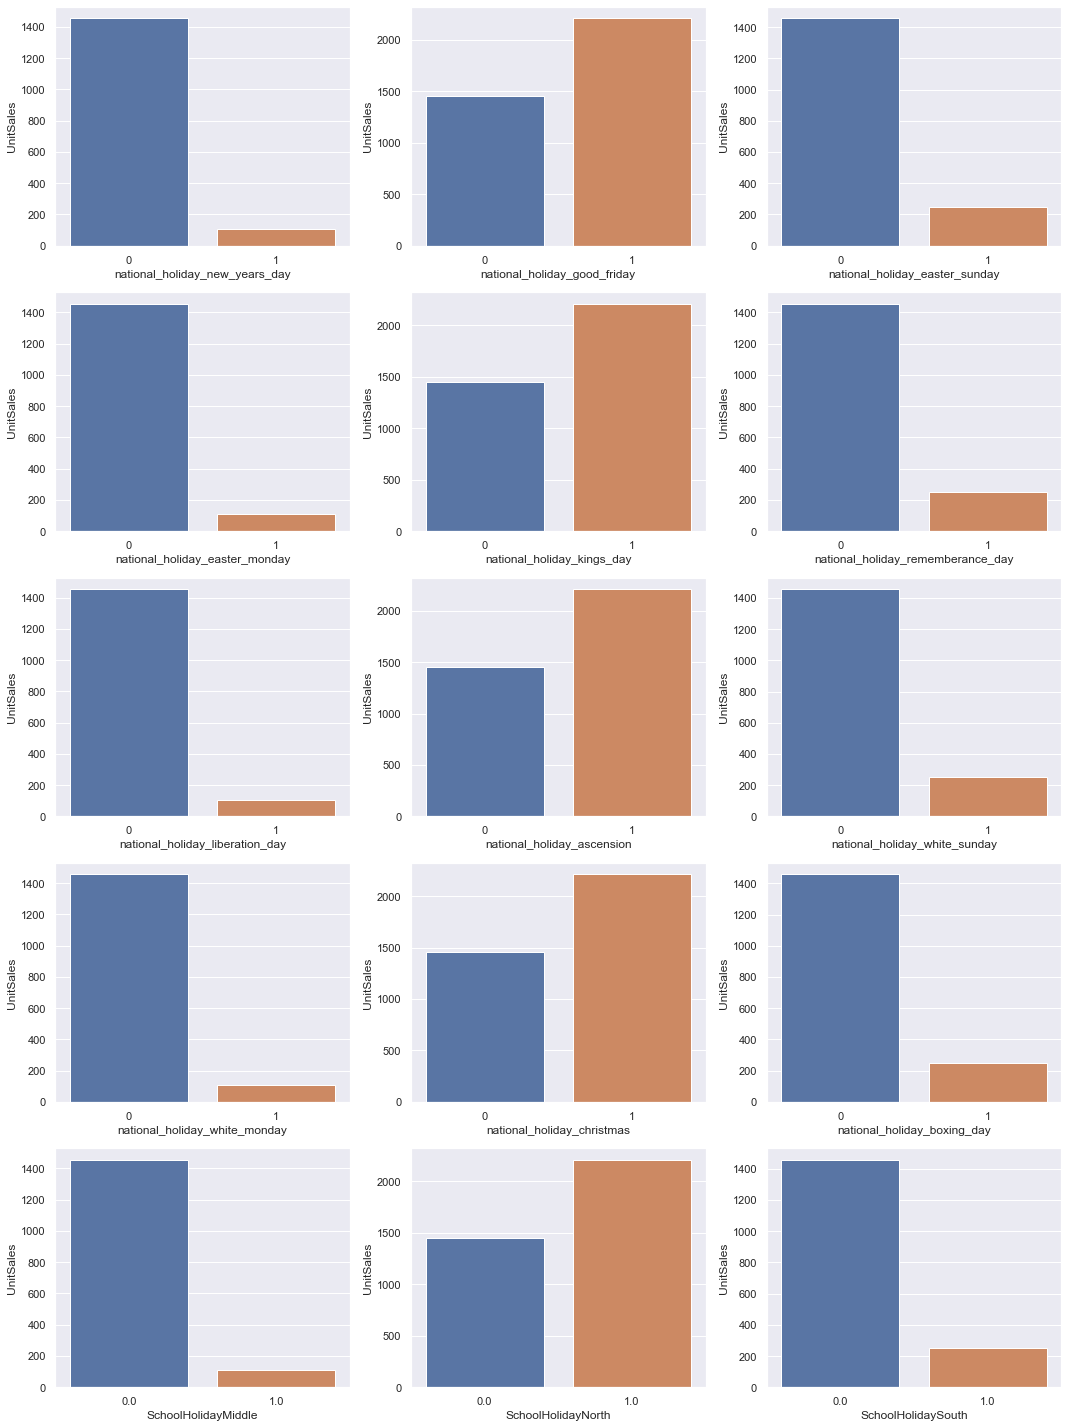

In [326]:
fig, ax = plt.subplots(5,3, figsize = (15,20))
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.barplot(holiday_list[0].index, holiday_list[0].UnitSales, ax = ax[0,0])
sns.barplot(holiday_list[1].index, holiday_list[1].UnitSales, ax = ax[0,1])
sns.barplot(holiday_list[2].index, holiday_list[2].UnitSales, ax = ax[0,2])

sns.barplot(holiday_list[3].index, holiday_list[0].UnitSales, ax = ax[1,0])
sns.barplot(holiday_list[4].index, holiday_list[1].UnitSales, ax = ax[1,1])
sns.barplot(holiday_list[5].index, holiday_list[2].UnitSales, ax = ax[1,2])

sns.barplot(holiday_list[6].index, holiday_list[0].UnitSales, ax = ax[2,0])
sns.barplot(holiday_list[7].index, holiday_list[1].UnitSales, ax = ax[2,1])
sns.barplot(holiday_list[8].index, holiday_list[2].UnitSales, ax = ax[2,2])

sns.barplot(holiday_list[9].index, holiday_list[0].UnitSales, ax = ax[3,0])
sns.barplot(holiday_list[10].index, holiday_list[1].UnitSales, ax = ax[3,1])
sns.barplot(holiday_list[11].index, holiday_list[2].UnitSales, ax = ax[3,2])

sns.barplot(holiday_list[12].index, holiday_list[0].UnitSales, ax = ax[4,0])
sns.barplot(holiday_list[13].index, holiday_list[1].UnitSales, ax = ax[4,1])
sns.barplot(holiday_list[14].index, holiday_list[2].UnitSales, ax = ax[4,2])



plt.tight_layout()

#### Seasonal Decomposition Chart

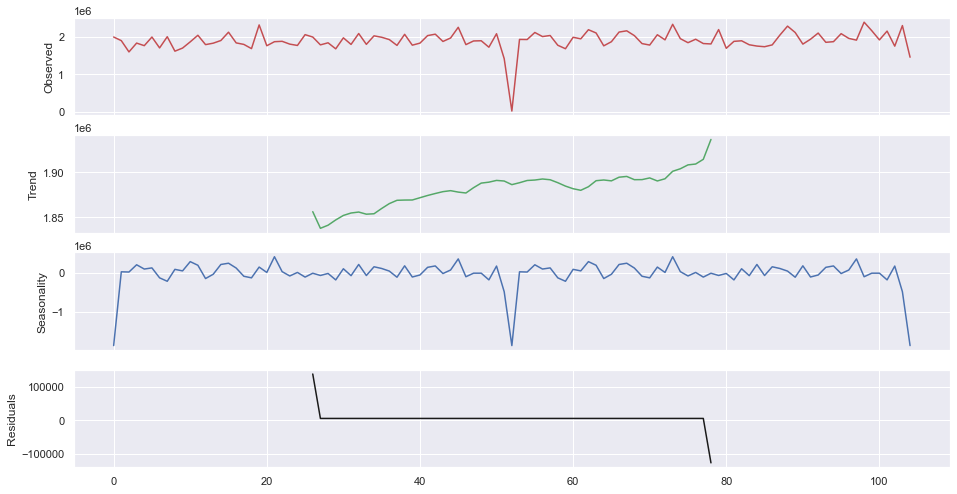

In [327]:
temp_df = df.groupby(["week-year"], as_index= False)["UnitSales"].sum()
X = temp_df["UnitSales"].values
df_forecast = temp_df["UnitSales"].to_frame()
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_forecast, period = 52)

fig, axes = plt.subplots(4, 1, sharex=True)

result.observed.plot(ax = axes[0], color='r')
axes[0].set_ylabel('Observed')

result.trend.plot(ax = axes[1], color='g')
axes[1].set_ylabel('Trend')

result.seasonal.plot(ax = axes[2])
axes[2].set_ylabel('Seasonality')

result.resid.plot(ax = axes[3], color='k')
axes[3].set_ylabel('Residuals');

##### We have an upwards trend for sure!

### Data Preprocessing & Feature Engineering

Firstly, I will create my target feature >  The sum of weekly sales. Next:

- The average of dayofweek_sales : (Friday average, Thursday average etc..) (days take values from 0 to 6 )

- Weekly Sales Average : Average of sales done per week. ( weeks take values from 0 to 51)

- Weekly Store Count : The sum of store count per week


- Weekly Shelf Capacity : The sum of shelf capacity per week

- Weekly Promo Shelf Capacity : The sum of promo shelf capacity per week

In [328]:
df["weekly_sales_sum"] = df.groupby(["week", "year"], as_index= False)["UnitSales"].transform("sum")
df["dayofweek_sales_avg"] = df.groupby("dayofweek")["UnitSales"].transform("mean")
df["weekly_sales_avg"] = df.groupby("week")["UnitSales"].transform("mean")
df["weekly_store_count"] = df.groupby(["week", "year"], as_index= False)["StoreCount"].transform("sum")
df["weekly_shelfcapacity"] = df.groupby(["week", "year"], as_index= False)["ShelfCapacity"].transform("sum")
df["weekly_promoshelfcapacity"] = df.groupby(["week", "year"], as_index= False)["PromoShelfCapacity"].transform("sum")

Let's replace False with 0 and True with 1 in IsPromo


In [329]:
df.IsPromo = df.IsPromo.replace({False: 0, True: 1})

Since our dataframe is based on daily transactions ( multiple rows per day ), I want to convert it into a weekly dataframe. Therefore I have to apply some transformations to other columns, just like I did with " weekly sales sum "

Now, at the code cell right below, I converted my holiday&promotion features into a weekly form. So basically, ispromo feature will now tell me how many is promo days have been existed in that week.

In [330]:
for i in ['IsPromo', 'national_holiday_new_years_day',
       'national_holiday_good_friday', 'national_holiday_easter_sunday',
       'national_holiday_easter_monday', 'national_holiday_kings_day',
       'national_holiday_rememberance_day', 'national_holiday_liberation_day',
       'national_holiday_ascension', 'national_holiday_white_sunday',
       'national_holiday_white_monday', 'national_holiday_christmas',
       'national_holiday_boxing_day', 'SchoolHolidayMiddle',
       'SchoolHolidayNorth', 'SchoolHolidaySouth']:
    df[i] = df.groupby(["day", "week", "month", "year"], as_index= False)[i].transform("max")
    name = i + "_count_in_week"
    df[name] = df.groupby(["week", "year"])[i].transform("sum")

For numerical columns, I will take their weekly means. And for categorical columns, I will take their weekly mode.

In [333]:
for i in ['TempMin', 'TempMax',
       'TempAvg','SundurationSum', "DiscountPercentage"]:
    name = i + "weekly_avg"
    df[name] = df.groupby(["week", "year"], as_index= False)[i].transform("mean")

In [334]:
for i in ['ItemNumber',
       'CategoryCode', 'GroupCode']:
    name = i + "weekly_mode"
    df[name] = df.groupby(["week", "year"], as_index= False)[i].transform("median")

We are ready to go with our weekly features!!!

In [336]:
df = df[['year', 'month', 'week', 'dayofweek', 'weekly_sales_sum',
       'dayofweek_sales_avg', 'weekly_sales_avg', 'weekly_store_count',
       'weekly_shelfcapacity', 'weekly_promoshelfcapacity',
       'IsPromo_count_in_week', 'national_holiday_new_years_day_count_in_week',
       'national_holiday_good_friday_count_in_week',
       'national_holiday_easter_sunday_count_in_week',
       'national_holiday_easter_monday_count_in_week',
       'national_holiday_kings_day_count_in_week',
       'national_holiday_rememberance_day_count_in_week',
       'national_holiday_liberation_day_count_in_week',
       'national_holiday_ascension_count_in_week',
       'national_holiday_white_sunday_count_in_week',
       'national_holiday_white_monday_count_in_week',
       'national_holiday_christmas_count_in_week',
       'national_holiday_boxing_day_count_in_week',
       'SchoolHolidayMiddle_count_in_week', 'SchoolHolidayNorth_count_in_week',
       'SchoolHolidaySouth_count_in_week', 'TempMinweekly_avg',
       'TempMaxweekly_avg', 'TempAvgweekly_avg',
       'SundurationSumweekly_avg', 'DiscountPercentageweekly_avg',
       'ItemNumberweekly_mode', 'CategoryCodeweekly_mode',
       'GroupCodeweekly_mode']]
data = df.drop_duplicates(["week", "year"])
data = data.reset_index(drop = True)

#### Let's take a look at the distribution of sales

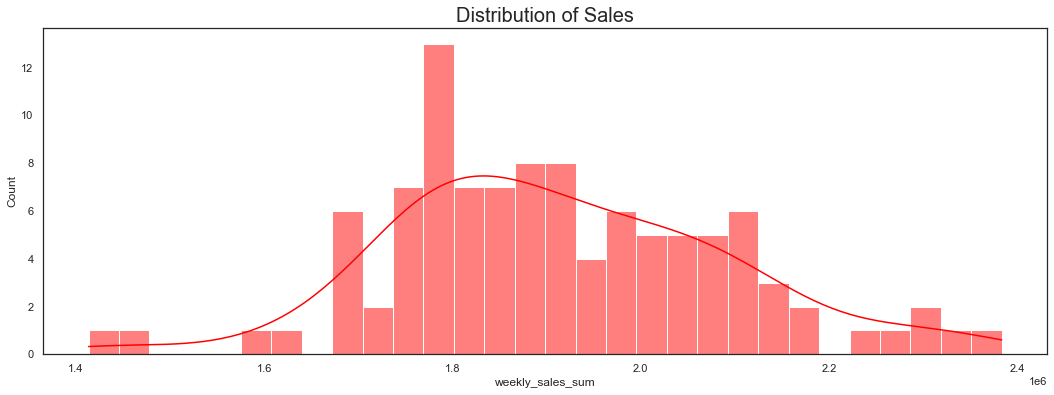

In [337]:
sns.set(rc={'figure.figsize':(18,6)})
sns.set_style("white")
sns.histplot(data.weekly_sales_sum, kde = True, bins = 30, color = "red").set_title("Distribution of Sales", fontsize =20);

##### Group Code pie chart

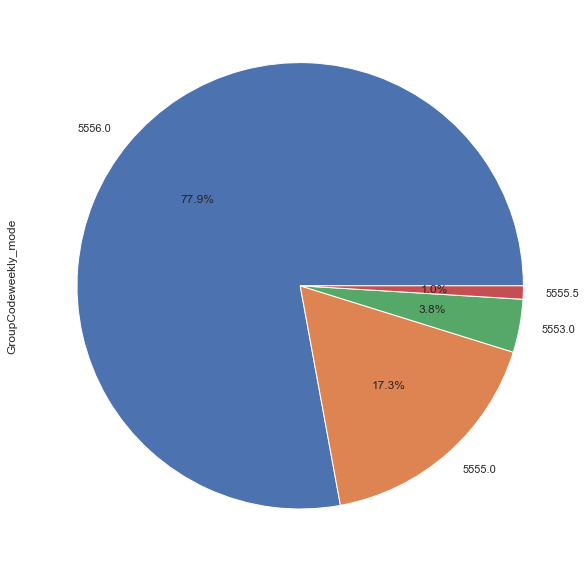

In [338]:
plt.figure(figsize=(10,15))
data['GroupCodeweekly_mode'].value_counts().plot.pie(autopct = "%1.1f%%")
plt.show()

##### Let's compare years by sales

In [339]:
yearly_sale = df.groupby('year')['weekly_sales_sum']
yearly_sale.sum().astype(int)

year
2016    119862014378
2017    142265733166
Name: weekly_sales_sum, dtype: int64

<Figure size 864x576 with 0 Axes>

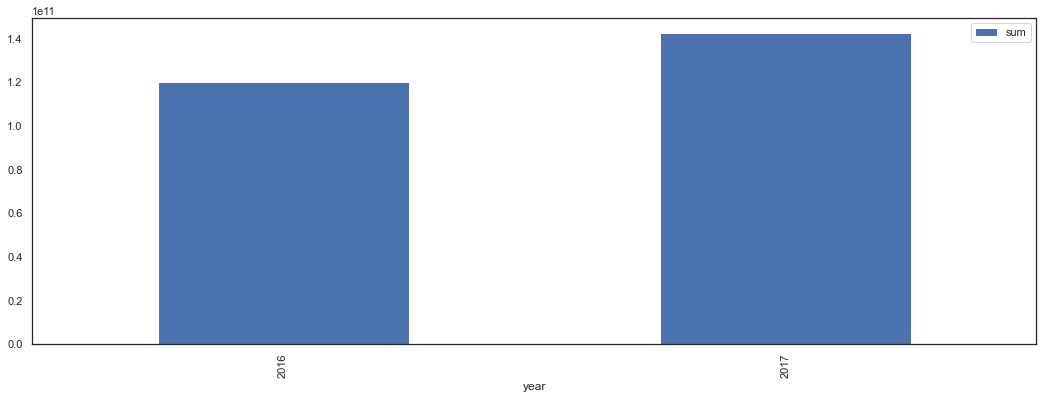

In [340]:
plt.figure(figsize=(12, 8))
yearly_sale.agg(['sum']).plot.bar()
plt.show()

Let's create some other useful features! 

It's quite clear that lag features play huge role in forecasting problems, thats why I will try few lag tricks in here!

In [341]:
data["weekly_shelfcapacity_shifted1"] = data["weekly_shelfcapacity"].shift(1)
data["GroupCodeweekly_mode_shifted1"] = data["GroupCodeweekly_mode"].shift(1)

In [342]:
data["weekly_store_count_shifted2"] = data["weekly_store_count"].shift(2)
data["weekly_store_count_shifted3"] = data["weekly_store_count"].shift(3)
data["weekly_store_count_shifted4"] = data["weekly_store_count"].shift(4)

Okay, we are ready to go! Let's forecast 5 months!

In [373]:
train = data[:-1]
test = data[-1:]

X_train = train.drop(["weekly_sales_sum"],1)
y_train = train.weekly_sales_sum

X_test = test.drop(["weekly_sales_sum"],1)
y_test = test.weekly_sales_sum

#### LightGBM

In [376]:
import lightgbm as lgbm
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
def smape(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)
lgbm_model = lgbm.LGBMRegressor(objective = "regression")
lgbm_model.fit(X_train, y_train)
lgbm_preds = lgbm_model.predict(X_test)

In [377]:
lgbm_result = smape(y_test, lgbm_preds)

In [378]:
print("LightGBM model has SMAPE score of {}".format(lgbm_result))

LightGBM model has SMAPE score of 5.3816860120499594


#### XGBoost

In [379]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)
preds_xgb = xgb_model.predict(X_test)

In [380]:
xgb_result = smape(y_test, preds_xgb)
print("XGBoost model has SMAPE score of {}".format(xgb_result))

XGBoost model has SMAPE score of 21.646590181934062


#### CatBoost

In [381]:
import catboost as cat

cat_model = cat.CatBoostRegressor()
cat_model.fit(X_train, y_train)
preds_cat = cat_model.predict(X_test)

Learning rate set to 0.02859
0:	learn: 172780.9278916	total: 1.62ms	remaining: 1.62s
1:	learn: 171270.1635793	total: 2.65ms	remaining: 1.32s
2:	learn: 169492.6999239	total: 3.85ms	remaining: 1.28s
3:	learn: 168085.0905521	total: 4.94ms	remaining: 1.23s
4:	learn: 166699.7602481	total: 5.91ms	remaining: 1.18s
5:	learn: 165856.3354942	total: 6.88ms	remaining: 1.14s
6:	learn: 164686.7291181	total: 7.65ms	remaining: 1.08s
7:	learn: 163398.1893018	total: 8.57ms	remaining: 1.06s
8:	learn: 161653.4834604	total: 10.4ms	remaining: 1.14s
9:	learn: 160464.1290164	total: 10.8ms	remaining: 1.07s
10:	learn: 159088.2490084	total: 11.5ms	remaining: 1.03s
11:	learn: 157702.3438260	total: 12.6ms	remaining: 1.04s
12:	learn: 156686.9826620	total: 13.6ms	remaining: 1.03s
13:	learn: 155492.9732587	total: 14.4ms	remaining: 1.01s
14:	learn: 154311.2482345	total: 15.4ms	remaining: 1.01s
15:	learn: 153134.3460549	total: 16.4ms	remaining: 1.01s
16:	learn: 152000.9942069	total: 17.3ms	remaining: 1s
17:	learn: 1507

In [382]:
cat_result = smape(y_test, preds_cat)
cat_result
print("CatBoost model has SMAPE score of {}".format(cat_result))

CatBoost model has SMAPE score of 4.763431400764477


#### Let's try some time series algorithms

In [456]:
X = df_forecast.values
train, test = df_forecast[0:104], df_forecast[104:]

In [457]:
test

,UnitSales
104,1451300.0


### Let's start with AR ( Auto Regression )

In [421]:
from statsmodels.tsa.ar_model import AutoReg
lags = range(1,15,1)
p_params = []

SMAPE = []

for lag in lags:

    try:
        model = AutoReg(train.UnitSales, lags=lag)  # use time span of 1 year for lagging
        trained_model = model.fit()
        predictions = trained_model.predict(start=len(train), 
                                    end=len(train) + len(test))

        error_smape = smape(test.UnitSales, predictions)
        SMAPE.append(error_smape)
        p_params.append(lag)
    except:
        continue
    
for i,j in zip(p_params, SMAPE):
    print("For p of {} , SMAPE is {}".format(i,j))


For p of 1 , SMAPE is 29.26520773978868
For p of 2 , SMAPE is 29.84494882713127
For p of 3 , SMAPE is 29.9657329947452
For p of 4 , SMAPE is 29.98136521267606
For p of 5 , SMAPE is 30.282067751966075
For p of 6 , SMAPE is 33.625170692660575
For p of 7 , SMAPE is 34.256227605081534
For p of 8 , SMAPE is 34.50150837034764
For p of 9 , SMAPE is 34.40954876061139
For p of 10 , SMAPE is 34.14765934008821
For p of 11 , SMAPE is 34.15192776793381
For p of 12 , SMAPE is 34.90983511985492
For p of 13 , SMAPE is 34.922017622902715
For p of 14 , SMAPE is 35.26724355244775


Best model is with p == 1

In [423]:

AR_model = AutoReg(train, lags=1)  # use time span of 1 year for lagging
trained_model = AR_model.fit()
predictions = trained_model.predict(start=len(train), 
                                    end=len(train) + len(test) - 1).astype(int)
AR_error_smape = smape(test.UnitSales, predictions)
print("AR model has SMAPE score of {}".format(AR_error_smape))



AR model has SMAPE score of 29.265200976316475


#### Let's try MA ( Moving Average )

In [424]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [425]:
q_list = range(1,15)
q_params = []

SMAPE = []

for q in q_list:

    try:
        MA_model = ARIMA(endog=train, order=(0, 0, q))
        MA_model = MA_model.fit()

        predictions = MA_model.predict(start=test.index[0], 
                                    end=test.index[-1])

        error_SMAPE = smape(test.UnitSales, predictions)
        SMAPE.append(error_SMAPE)
        q_params.append(q)
    except:
        continue
    
for i,j in zip(q_params, SMAPE):
    print("For q of {} , SMAPE is {}".format(i,j))


For q of 1 , SMAPE is 29.69179073229758
For q of 2 , SMAPE is 29.96506449888371
For q of 3 , SMAPE is 29.873783833397283
For q of 4 , SMAPE is 29.881125849809344
For q of 5 , SMAPE is 29.87090821233982
For q of 6 , SMAPE is 33.591536105682266
For q of 7 , SMAPE is 33.64266574523705
For q of 8 , SMAPE is 33.654605440128606
For q of 9 , SMAPE is 33.6041780486145
For q of 10 , SMAPE is 33.865909106608896
For q of 11 , SMAPE is 33.7469204577354
For q of 12 , SMAPE is 34.39848706161589
For q of 13 , SMAPE is 34.950532807543325
For q of 14 , SMAPE is 34.81276893828044


Best MA model is with q = 1

In [426]:
MA_model = ARIMA(endog=train, order=(0, 0, 1))
MA_model = MA_model.fit()

predictions = MA_model.predict(start=test.index[0], 
                            end=test.index[-1])

MA_error_SMAPE = smape(test.UnitSales, predictions)
print("MA model has SMAPE score of {}".format(MA_error_SMAPE))

MA model has SMAPE score of 29.69179073229758


### ARMA

In [427]:
q_list = [1,2,3,4,5,6]
p_list = [1,2,3,4]

SMAPE = []
p_q_params = []

for q in q_list:
    for p in p_list:

        try:
            ARMA_model = ARIMA(endog=train, order=(p, 0, q))
            ARMA_model = ARMA_model.fit()

            predictions = ARMA_model.predict(start=test.index[0], 
                                        end=test.index[-1])

            error_SMAPE = smape(test.UnitSales, predictions)
            SMAPE.append(error_SMAPE)
            p_q_params.append([p,q])
        except:
            continue
for i,j in zip(p_q_params, SMAPE):
    print("For p of {}, q of {} , SMAPE is {}".format(i[0], i[1], j))

For p of 1, q of 1 , SMAPE is 29.96853613822384
For p of 2, q of 1 , SMAPE is 29.840602734064397
For p of 3, q of 1 , SMAPE is 29.857961178131227
For p of 4, q of 1 , SMAPE is 29.87799124218904
For p of 1, q of 2 , SMAPE is 29.876849648551087
For p of 2, q of 2 , SMAPE is 31.31222043977206
For p of 3, q of 2 , SMAPE is 32.230447121478726
For p of 4, q of 2 , SMAPE is 32.30983995497268
For p of 1, q of 3 , SMAPE is 30.18316852308195
For p of 2, q of 3 , SMAPE is 30.27733886432552
For p of 3, q of 3 , SMAPE is 30.622193283858923
For p of 4, q of 3 , SMAPE is 29.053965401575788
For p of 1, q of 4 , SMAPE is 30.906501246929547
For p of 2, q of 4 , SMAPE is 34.23947095407947
For p of 3, q of 4 , SMAPE is 31.32880163795536
For p of 4, q of 4 , SMAPE is 29.414105914268173
For p of 1, q of 5 , SMAPE is 31.054571562872162
For p of 2, q of 5 , SMAPE is 31.627845870422423
For p of 3, q of 5 , SMAPE is 31.36460675490086
For p of 4, q of 5 , SMAPE is 34.29217460297345
For p of 1, q of 6 , SMAPE is 

Best Arima model is with p = 4, q = 3

In [428]:
ARMA_model = ARIMA(endog=train, order=(4, 0, 3))
ARMA_model = ARMA_model.fit()

predictions = ARMA_model.predict(start=test.index[0], 
                            end=test.index[-1])

ARMA_result = smape(test.UnitSales, predictions)
print("ARMA model has SMAPE score of {}".format(ARMA_result))

ARMA model has SMAPE score of 29.053965401575788


### Let's compare the results

In [429]:
comparison_df  =pd.DataFrame([lgbm_result , xgb_result, cat_result, AR_error_smape, MA_error_SMAPE, ARMA_result], columns = ["SMAPE Score"])
comparison_df.index = ["LightGBM", "XGBoost", "CatBoost", "AR", "MA", "ARMA"]
comparison_df = comparison_df.T

In [430]:
comparison_df

,LightGBM,XGBoost,CatBoost,AR,MA,ARMA
SMAPE Score,5.381686,21.64659,4.763431,29.265201,29.691791,29.053965


Our best prediction comes from CatBoost model!

In [519]:
compare = pd.DataFrame(y_test.values, columns = ["real_sales_number"])
compare["predictions"] = preds_cat.astype(int)

In [521]:
compare["difference"] = compare.real_sales_number - compare.predictions

In [523]:
compare["difference percentage"] = compare.difference / compare.real_sales_number

In [524]:
compare

,real_sales_number,predictions,difference,difference percentage
0,2293347.0,2186646,106701.0,0.046526


### LONG LIVE CATBOOST!